In [25]:
#%matplotlib notebook
import requests
from bs4 import BeautifulSoup

# from google.colab import files

#url_req = (['?imei=350424060069364&s_dt=2022-09-09%2006:40:00&e_dt=2022-09-14%2018:50:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-09%2006:40:00&e_dt=2022-09-09%2018:50:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-11%2006:02:00&e_dt=2022-09-11%2018:50:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-10%2000:00:00&e_dt=2022-09-13%2023:50:00'])
#url_req = (['?imei=350424060069364&s_dt=2022-09-19%2007:02:00&e_dt=2022-09-19%2016:30:00'])
url_req = (['?imei=350424060069364&s_dt=2022-09-27%2009:00:00&e_dt=2022-09-27%2023:59:59'])

web_link = 'https://nav.by/info/testAccel.php'

db_files = []

### postman
import requests

url = "https://nav.by/login_get_data.php?type=LOGIN&data%5Blogin%5D=diler_el_vek&data%5Bpwd%5D=111111&data%5BscreenWidth%5D=1920&data%5BscreenHeight%5D=1080"

payload = {}
headers = {
    'Cookie': 'pc_id=60b9bbc0-bef7-4c4b-9052-003672c5d1a9; ses_id=15fb4b00-046b-4e59-bd88-175381dd03b8'
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)


### postman

def remove_str(value, deletechars_):
    for c in deletechars_:
        value = value.replace(c, '_')
    return value


NUM_OF_FILES = len(url_req)
for p in range(NUM_OF_FILES):

    name_of_file = remove_str(url_req[p], '\/:*?"<>|&%=-')
    db_files.append(name_of_file)

    print(name_of_file)

    file = open(name_of_file + ".csv", "w")
    file.close()

    response = requests.request("GET", web_link + url_req[p], headers=headers, data=payload)
    soup = BeautifulSoup(response.text, 'lxml')

    file = open(name_of_file + ".csv", "a+")

    quotes = soup.find_all('p')
    for quote in quotes:
        file.write(quote.text)
    file.close()

    file = open(name_of_file + ".csv", "r")
    lines = file.readlines()
    file.close()

    f_first_line = 1

    file = open(name_of_file + ".csv", "w")
    for line in lines:
        if f_first_line == 1:
            file.write(line)
            f_first_line = 0
        if ((
                line != "date;speed;78;64011;64022;64033;64044;delta64011;delta64022;delta64033;delta64044;vodo;lat;lon;dir;alt;engine_speed;distance_gps;201;202;203;204;210;211;212;213;214;215;ain1;ain2;151;146;147\n") and (
                line != "\n")):
            file.write(line)

    file.close()

{"url":".\/info\/help.php","exitCode":0}
_imei_350424060069364_s_dt_2022_09_27_2009_00_00_e_dt_2022_09_27_2023_59_59


In [26]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

import seaborn as sns
from array import array

sns.set(style="darkgrid")

In [27]:
from scipy.optimize import curve_fit

# initial guesses for k1, k2, k3, k4, k5, k6:
kfc3_init = 1.0, 1.0, 1.0, 1.0

def func3_fuel_consumption(x, k2, k3, k4, k5):
    delta_es_app_, delta_es_2_app_, delta_es_app_2_, delta_es_2_app_2_ = x
    return k2 * delta_es_app_ + k3 * delta_es_2_app_ + k4 * delta_es_app_2_ + k5 * delta_es_2_app_2_

569337
317301
355585
201081
---
1.7943120254899922
1.6011277191107611
2.8313813836215256


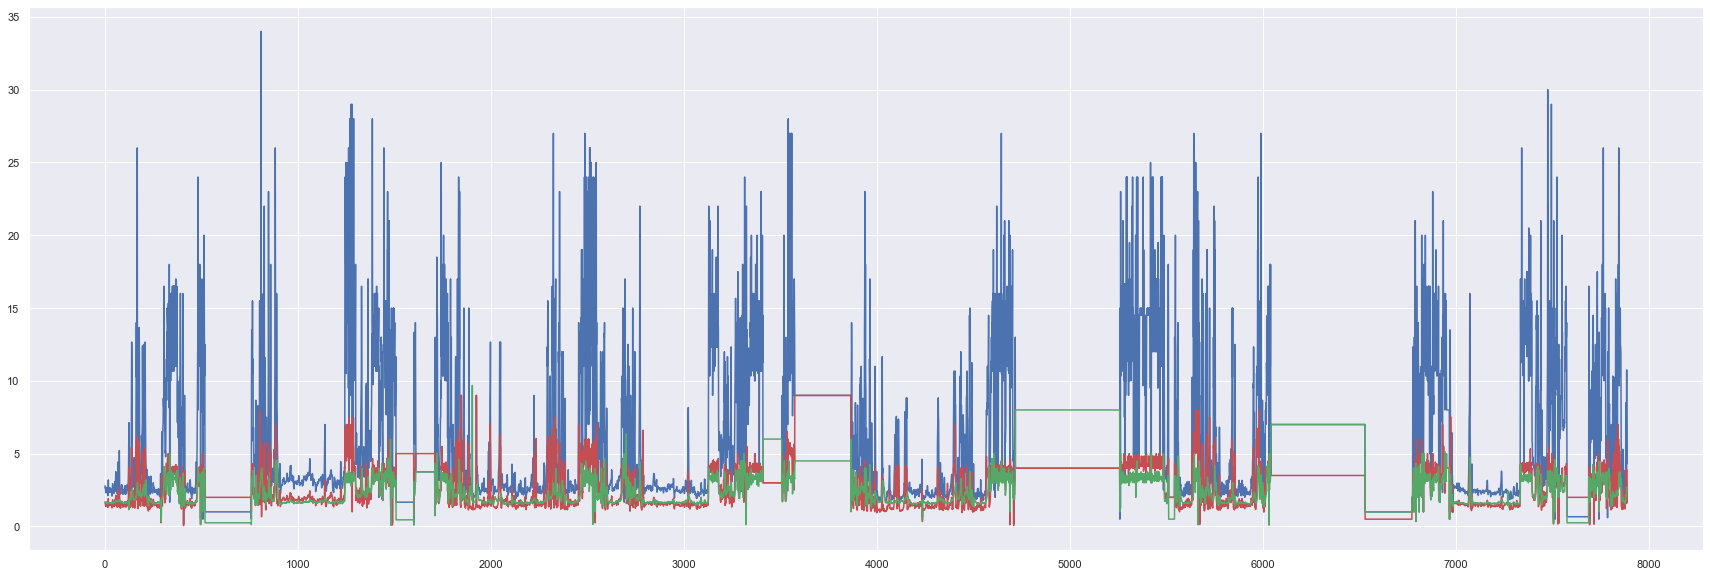

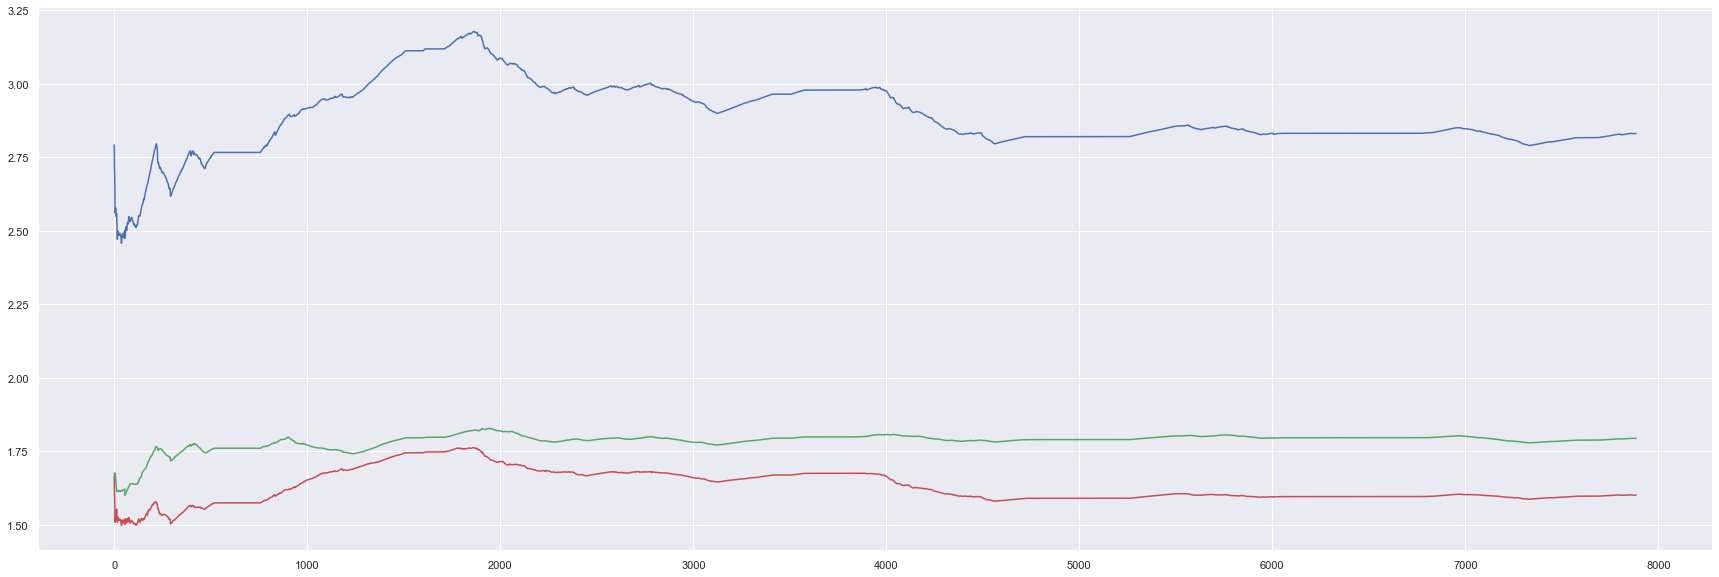

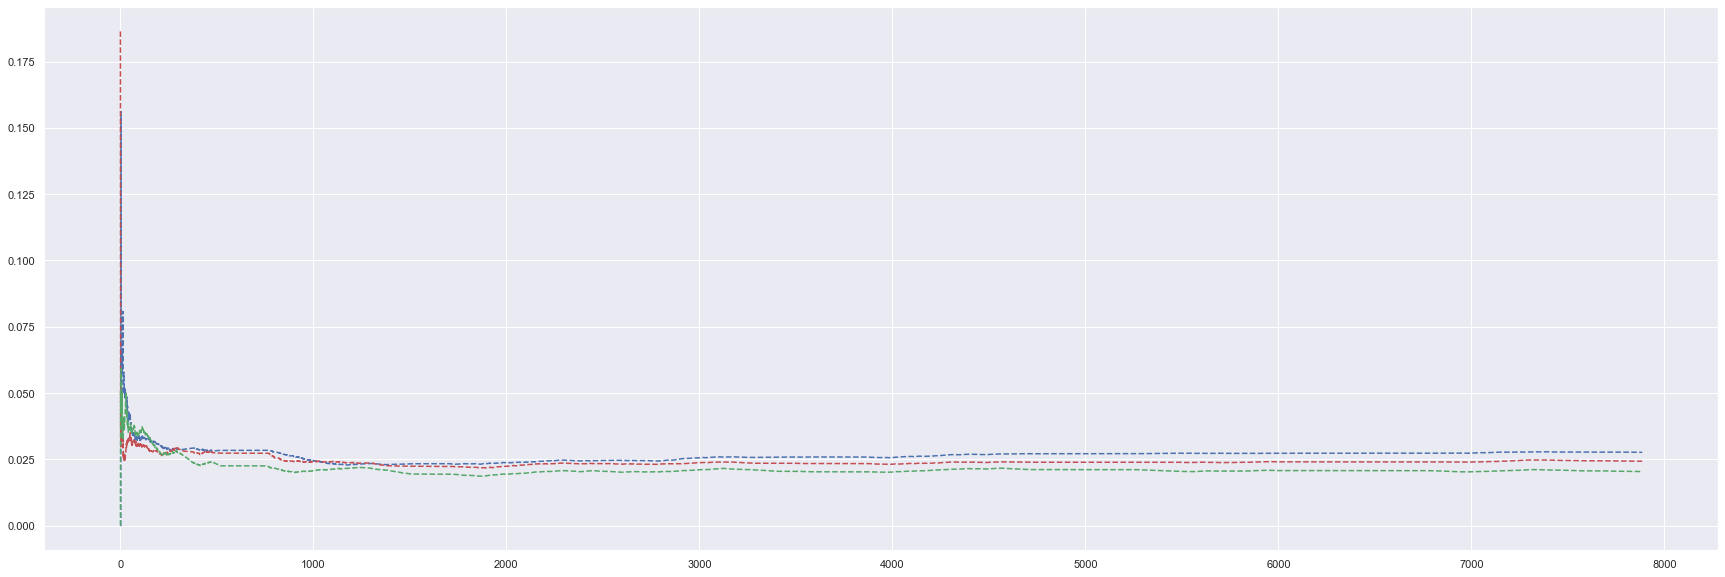

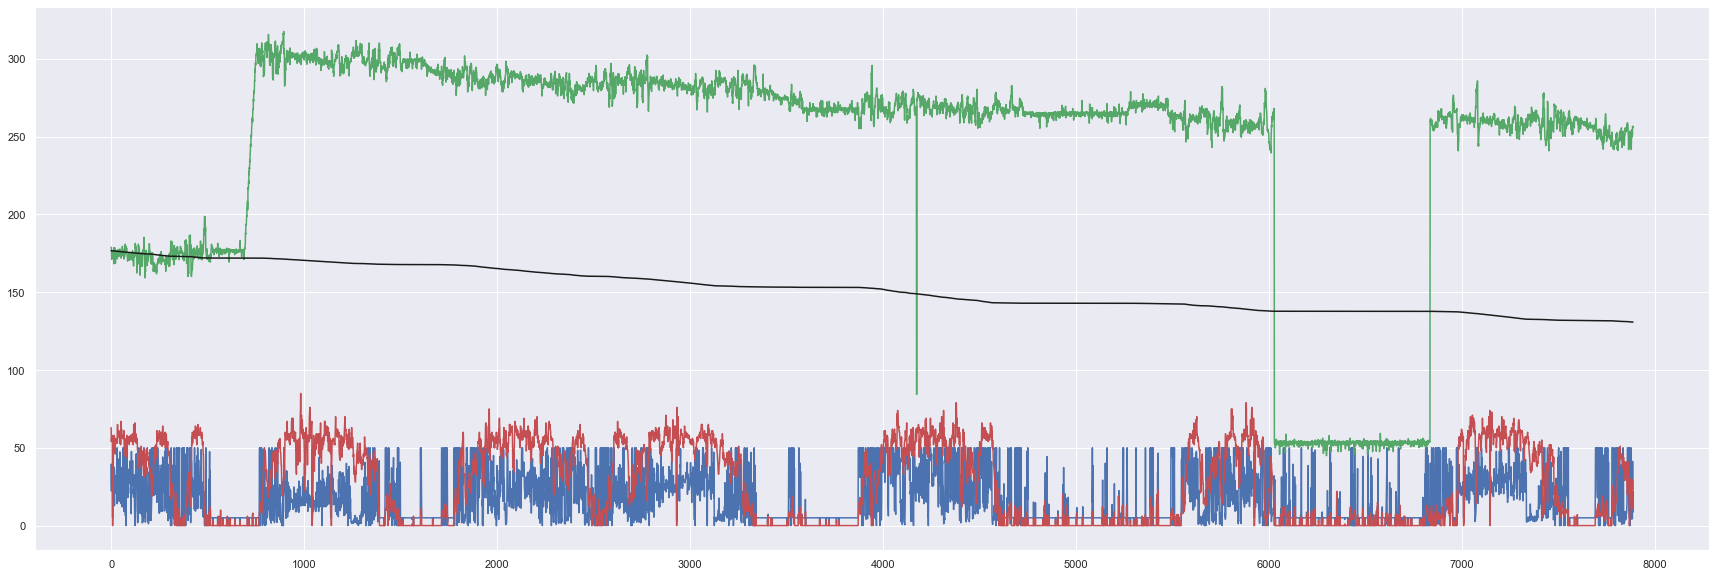

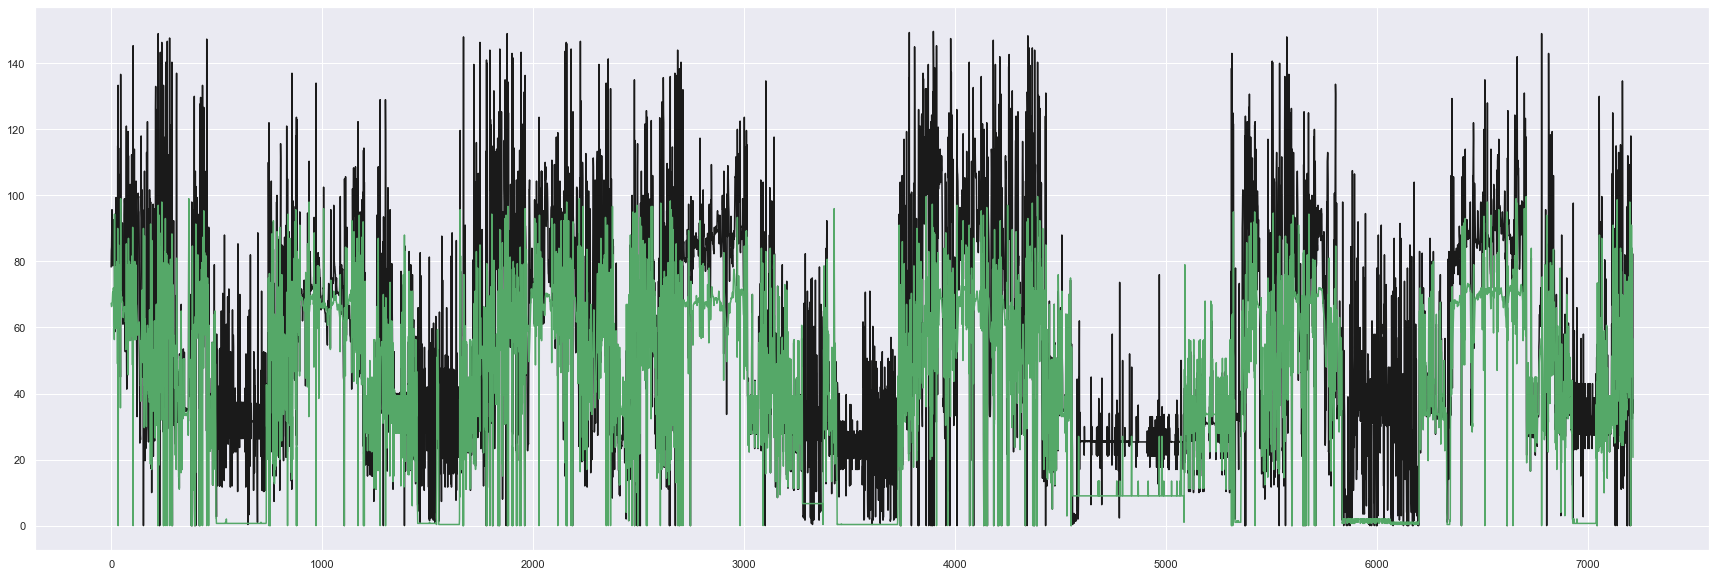

In [28]:
delta_ES = []
delta_ES_APP = []
delta_ES_2_APP = []
delta_ES_APP_2 = []
delta_ES_2_APP_2 = []

inst_cons = []
inst_speed = []
inst_acc_plus = []
inst_acc_minus = []
dut_rf = []
dut = []
es = []
app = []
ttt = []
relation1 = []
relation2 = []
relation3 = []
relation4 = []
relation5 = []
relation6 = []
relation7 = []
relation8 = []
relation9 = []

popt3_calc = [(0.003276728)*1.8684/100, (-0.008181688)*1.8684/100, 0.004813692*3.4909/100, (-3.33334E-05)*3.4909/100]
#popt3_calc = [110*0.0/1391684.0, 112*0.0/854199.0, 112*0.0/973357.0, 112*1.0/586476.0]

df = pd.read_csv(db_files[0] + '.csv', sep=';', engine='python', decimal=',')
df.columns = ['date', 'speed', 'rowdata', 'z', 'y', 'x_m', 'x_p', 'delta64011', 'delta64022', 'delta64033',
              'delta64044', 'vodo', 'lat', 'lon', 'dir', 'alt', 'engine_speed', 'distance_gps', 'sum_ES',
              'mark_ind1', 'sum_ES_APP', 'mark_ind2', 'sum_ES_2_APP', 'mark_ind3', 'sum_ES_APP_2', 'mark_ind4',
              'sum_ES_2_APP_2', 'mark_ind5', 'AnIn1', 'AnIn2', 'CAN1', 'CAN2', 'CAN3']


df["consum_l"] = 0.0
df["consum_t"] = 0.0
df["dut_calc"] = 0.0

df["sum_ES_can"] = 0.0
df["sum_APP_can"] = 0.0
df["sum_ES_APP_can"] = 0.0
df["sum_ES_2_APP_can"] = 0.0
df["sum_ES_APP_2_can"] = 0.0
df["sum_ES_2_APP_2_can"] = 0.0
df["sum_ES_APP_3_can"] = 0.0
df["sum_ES_3_APP_can"] = 0.0
df["sum_ES_2_APP_3_can"] = 0.0
df["sum_ES_3_APP_2_can"] = 0.0
df["sum_ES_3_APP_3_can"] = 0.0
df["sum_ES_2_can"] = 0.0

sum_ES_sum = 0
sum_APP_sum = 0
sum_ES_APP_sum = 0
sum_ES_2_APP_sum = 0
sum_ES_APP_2_sum = 0
sum_ES_2_APP_2_sum = 0
sum_ES_APP_3_sum = 0
sum_ES_3_APP_sum = 0
sum_ES_2_APP_3_sum = 0
sum_ES_3_APP_2_sum = 0
sum_ES_3_APP_3_sum = 0
sum_ES_2_sum = 0

sum_ES_inst = 0
sum_APP_inst = 0
sum_ES_APP_inst = 0
sum_ES_2_APP_inst = 0
sum_ES_APP_2_inst = 0
sum_ES_2_APP_2_inst = 0
sum_ES_APP_3_inst = 0
sum_ES_3_APP_inst = 0
sum_ES_2_APP_3_inst = 0
sum_ES_3_APP_2_inst = 0
sum_ES_3_APP_3_inst = 0
sum_ES_2_inst = 0

dut_begine = df.AnIn1[0]

count_p = 0
count_m = 0

max_es = 100
max_app = 150
delta_es = 5
delta_app = 5
num_interval_es = max_es//delta_es
num_interval_app = max_app//delta_app
working_time = [[0] * num_interval_es for i in range(num_interval_app)]

for i in range(2, len(df)):

    if (df.CAN1[i]&0xffff) > (df.CAN1[i-1]&0xffff):
        sum_ES_inst = ((df.CAN1[i])&0xffff) - ((df.CAN1[i-1])&0xffff)
        sum_ES_sum += sum_ES_inst

    if ((df.CAN1[i]>>16)&0xffff) > ((df.CAN1[i-1]>>16)&0xffff):
        sum_APP_inst = ((df.CAN1[i]>>16)&0xffff) - ((df.CAN1[i-1]>>16)&0xffff)
        sum_APP_sum += sum_APP_inst

    if ((df.CAN1[i]>>32)&0xffff) > ((df.CAN1[i-1]>>32)&0xffff):
        sum_ES_APP_inst = ((df.CAN1[i]>>32)&0xffff) - ((df.CAN1[i-1]>>32)&0xffff)
        sum_ES_APP_sum += sum_ES_APP_inst

    if ((df.CAN1[i]>>48)&0xffff) > ((df.CAN1[i-1]>>48)&0xffff):
        sum_ES_2_APP_inst = ((df.CAN1[i]>>48)&0xffff) - ((df.CAN1[i-1]>>48)&0xffff)
        sum_ES_2_APP_sum += sum_ES_2_APP_inst


    if (df.CAN2[i]&0xffff) > (df.CAN2[i-1]&0xffff):
        sum_ES_APP_2_inst = (df.CAN2[i]&0xffff) - (df.CAN2[i-1]&0xffff)
        sum_ES_APP_2_sum += sum_ES_APP_2_inst

    if ((df.CAN2[i]>>16)&0xffff) > ((df.CAN2[i-1]>>16)&0xffff):
        sum_ES_2_APP_2_inst = ((df.CAN2[i]>>16)&0xffff) - ((df.CAN2[i-1]>>16)&0xffff)
        sum_ES_2_APP_2_sum += sum_ES_2_APP_2_inst

    if ((df.CAN2[i]>>32)&0xffff) > ((df.CAN2[i-1]>>32)&0xffff):
        sum_ES_APP_3_inst = ((df.CAN2[i]>>32)&0xffff) - ((df.CAN2[i-1]>>32)&0xffff)
        sum_ES_APP_3_sum += sum_ES_APP_3_inst

    if ((df.CAN2[i]>>48)&0xffff) > ((df.CAN2[i-1]>>48)&0xffff):
        sum_ES_3_APP_inst = ((df.CAN2[i]>>48)&0xffff) - ((df.CAN2[i-1]>>48)&0xffff)
        sum_ES_3_APP_sum += sum_ES_3_APP_inst


    if (df.CAN3[i]&0xffff) > (df.CAN3[i-1]&0xffff):
        sum_ES_2_APP_3_inst = (df.CAN3[i]&0xffff) - (df.CAN3[i-1]&0xffff)
        sum_ES_2_APP_3_sum += sum_ES_2_APP_3_inst

    if ((df.CAN3[i]>>16)&0xffff) > ((df.CAN3[i-1]>>16)&0xffff):
        sum_ES_3_APP_2_inst = ((df.CAN3[i]>>16)&0xffff) - ((df.CAN3[i-1]>>16)&0xffff)
        sum_ES_3_APP_2_sum += sum_ES_3_APP_2_inst

    if ((df.CAN3[i]>>32)&0xffff) > ((df.CAN3[i-1]>>32)&0xffff):
        sum_ES_3_APP_3_inst = ((df.CAN3[i]>>32)&0xffff) - ((df.CAN3[i-1]>>32)&0xffff)
        sum_ES_3_APP_3_sum += sum_ES_3_APP_3_inst

    if ((df.CAN3[i]>>48)&0xffff) > ((df.CAN3[i-1]>>48)&0xffff):
        sum_ES_2_inst = ((df.CAN3[i]>>48)&0xffff) - ((df.CAN3[i-1]>>48)&0xffff)
        sum_ES_2_sum += sum_ES_2_inst

    df.at[i, "sum_ES_can"] = sum_ES_sum
    df.at[i, "sum_APP_can"] = sum_APP_sum
    df.at[i, "sum_ES_APP_can"] = sum_ES_APP_sum
    df.at[i, "sum_ES_2_APP_can"] = sum_ES_2_APP_sum
    df.at[i, "sum_ES_APP_2_can"] = sum_ES_APP_2_sum
    df.at[i, "sum_ES_2_APP_2_can"] = sum_ES_2_APP_2_sum
    df.at[i, "sum_ES_APP_3_can"] = sum_ES_APP_3_sum
    df.at[i, "sum_ES_3_APP_can"] = sum_ES_3_APP_sum
    df.at[i, "sum_ES_2_APP_3_can"] = sum_ES_2_APP_3_sum
    df.at[i, "sum_ES_3_APP_2_can"] = sum_ES_3_APP_2_sum
    df.at[i, "sum_ES_3_APP_3_can"] = sum_ES_3_APP_3_sum
    df.at[i, "sum_ES_2_can"] = sum_ES_2_sum

    if (sum_ES_2_APP_inst != 0) and (sum_ES_APP_inst/sum_ES_2_APP_inst < 40):
        relation7.append(sum_ES_APP_inst/sum_ES_2_APP_inst)
    else:
        relation7.append(0)

    if (sum_ES_APP_2_inst != 0) and (sum_ES_APP_inst/sum_ES_APP_2_inst < 40):
        relation8.append(sum_ES_APP_inst/sum_ES_APP_2_inst)
    else:
        relation8.append(0)

    if (sum_ES_2_APP_2_inst != 0) and (sum_ES_APP_inst/sum_ES_2_APP_2_inst < 40):
        relation9.append(sum_ES_APP_inst/sum_ES_2_APP_2_inst)
    else:
        relation9.append(0)

    if (sum_ES_2_APP_sum != 0) and (sum_ES_APP_sum/sum_ES_2_APP_sum < 40):
        relation1.append(sum_ES_APP_sum/sum_ES_2_APP_sum)
    else:
        relation1.append(0)

    if (sum_ES_APP_2_sum != 0) and (sum_ES_APP_sum/sum_ES_APP_2_sum < 40):
        relation2.append(sum_ES_APP_sum/sum_ES_APP_2_sum)
    else:
        relation2.append(0)

    if (sum_ES_2_APP_2_sum != 0) and (sum_ES_APP_sum/sum_ES_2_APP_2_sum < 40):
        relation3.append(sum_ES_APP_sum/sum_ES_2_APP_2_sum)
    else:
        relation3.append(0)

    if (sum_ES_2_APP_3_sum != 0) and (sum_ES_APP_sum/sum_ES_2_APP_3_sum < 40):
        relation4.append(sum_ES_APP_sum/sum_ES_2_APP_3_sum)
    else:
        relation4.append(0)

    if (sum_ES_3_APP_2_sum != 0) and (sum_ES_APP_sum/sum_ES_3_APP_2_sum < 40):
        relation5.append(sum_ES_APP_sum/sum_ES_3_APP_2_sum)
    else:
        relation5.append(0)

    if (sum_ES_3_APP_3_sum != 0) and (sum_ES_APP_sum/sum_ES_3_APP_3_sum < 40):
        relation6.append(sum_ES_APP_sum/sum_ES_3_APP_3_sum)
    else:
        relation6.append(0)

    consum_l = 0
    consum_t = 0

    if df.distance_gps[i] != 0:
        consum_l = (1/df.distance_gps[i])*func3_fuel_consumption(
            (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    if consum_l > 0.5:
        consum_l = 0.5
    if consum_l < 0:
        consum_l = 0
    if df.speed[i] < 5:
        consum_l = (5 - df.speed[i])/100
    df.at[i, 'consum_l'] = consum_l


    # try:
    #     if df.AnIn1[i] > (df.AnIn1[i - 60] + 50):
    #         count_p += 1
    #     else:
    #         count_p = 0
    #     if count_p > 10:
    #         dut_begine = df.AnIn1[i]
    #         count_p = 0
    #
    #         sum_ES_sum = 0
    #         sum_ES_APP_sum = 0
    #         sum_ES_2_APP_sum = 0
    #         sum_ES_APP_2_sum = 0
    #         sum_ES_2_APP_2_sum = 0
    # except:
    #     pass
    #
    # try:
    #     if df.AnIn1[i] < (df.AnIn1[i - 60] - 20):
    #         count_m += 1
    #     else:
    #         count_m = 0
    #     if count_m > 10:
    #         dut_begine = df.AnIn1[i]
    #         count_m = 0
    #
    #         sum_ES_sum = 0
    #         sum_ES_APP_sum = 0
    #         sum_ES_2_APP_sum = 0
    #         sum_ES_APP_2_sum = 0
    #         sum_ES_2_APP_2_sum = 0
    # except:
    #     pass

    #dut_calc = dut_begine
    dut_calc = dut_begine - func3_fuel_consumption(
            (sum_ES_APP_sum, sum_ES_2_APP_sum, sum_ES_APP_2_sum, sum_ES_2_APP_2_sum),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])
    df.at[i, 'dut_calc'] = dut_calc

    d_time = (datetime.strptime(df.date[i], "%Y-%m-%d %H:%M:%S.%f") - datetime.strptime(df.date[i-1], "%Y-%m-%d %H:%M:%S.%f")).seconds
    ttt.append(d_time)

    if d_time != 0:
        consum_t = (1/d_time)*func3_fuel_consumption(
            (sum_ES_APP_inst, sum_ES_2_APP_inst, sum_ES_APP_2_inst, sum_ES_2_APP_2_inst),
            popt3_calc[0], popt3_calc[1], popt3_calc[2], popt3_calc[3])

        # es.append(sum_ES_inst/d_time)
        # app.append(sum_APP_inst/d_time)

        if (sum_ES_inst/d_time) < max_es:
            es.append(sum_ES_inst/d_time)
        else:
            es.append(0)
        if (sum_APP_inst/d_time) < max_app:
            app.append(sum_APP_inst/d_time)
        else:
            app.append(0)

        index_es = int(sum_ES_inst/d_time)//delta_es
        index_app = int(sum_APP_inst/d_time)//delta_app

        if(index_es < num_interval_es) and (index_app < num_interval_app) and (index_es != 0):
            working_time[index_app][index_es] += d_time

    df.at[i, 'consum_t'] = consum_t

    dut_rf.append(dut_calc)
    dut.append(df.AnIn1[i])
    inst_cons.append(consum_l*100)
    inst_speed.append(df.speed[i])
    acc_delta = 10*df.delta64044[i]
    if acc_delta < 0:
        acc_delta = 0
    if acc_delta > 50:
        acc_delta = 50
    inst_acc_plus.append(acc_delta)
    acc_delta = -10*df.delta64033[i]
    if acc_delta > 0:
        acc_delta = 0
    if acc_delta < -50:
        acc_delta = -50
    inst_acc_minus.append(acc_delta)

df.to_csv(db_files[0] + '_changed' + '.csv', index=False)

print(sum_ES_APP_sum)
print(sum_ES_2_APP_sum)
print(sum_ES_APP_2_sum)
print(sum_ES_2_APP_2_sum)

print("---")
print(sum_ES_APP_sum/sum_ES_2_APP_sum)
print(sum_ES_APP_sum/sum_ES_APP_2_sum)
print(sum_ES_APP_sum/sum_ES_2_APP_2_sum)

# print(110/(sum_ES_APP_sum*4))
# print(110/(sum_ES_2_APP_sum*4))
# print(110/(sum_ES_APP_2_sum*4))
# print(110/(sum_ES_2_APP_2_sum*4))

plt.figure(figsize=(30, 10))
plt.plot(relation9, 'b')
plt.plot(relation8, 'r')
plt.plot(relation7, 'g')
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(relation3, 'b')
plt.plot(relation2, 'r')
plt.plot(relation1, 'g')
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(relation4, 'b--')
plt.plot(relation5, 'r--')
plt.plot(relation6, 'g--')
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(inst_cons, 'b')
plt.plot(inst_speed, 'r')
plt.plot(dut, 'g')
plt.plot(dut_rf, 'k')
plt.show()

plt.figure(figsize=(30, 10))
plt.plot(app, 'k')
plt.plot(es, 'g')
# plt.plot(df.sum_ES, 'r')
plt.show()

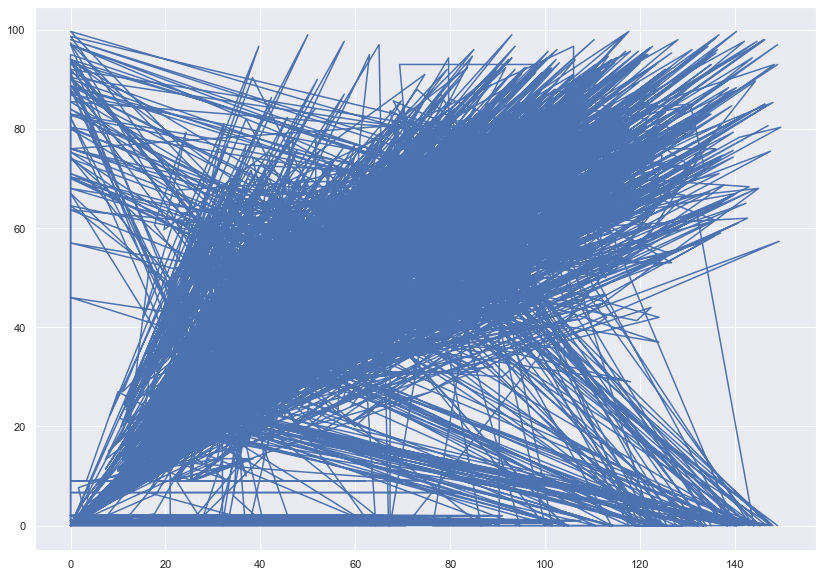

In [29]:
plt.figure(figsize=(14,10))
plt.plot(app, es)
plt.show()

C:\Users\zhenu\AppData\Local\Temp\ipykernel_3316\2587422534.py:26: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(orientation='vertical')
C:\Users\zhenu\AppData\Local\Temp\ipykernel_3316\2587422534.py:26: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(orientation='vertical')


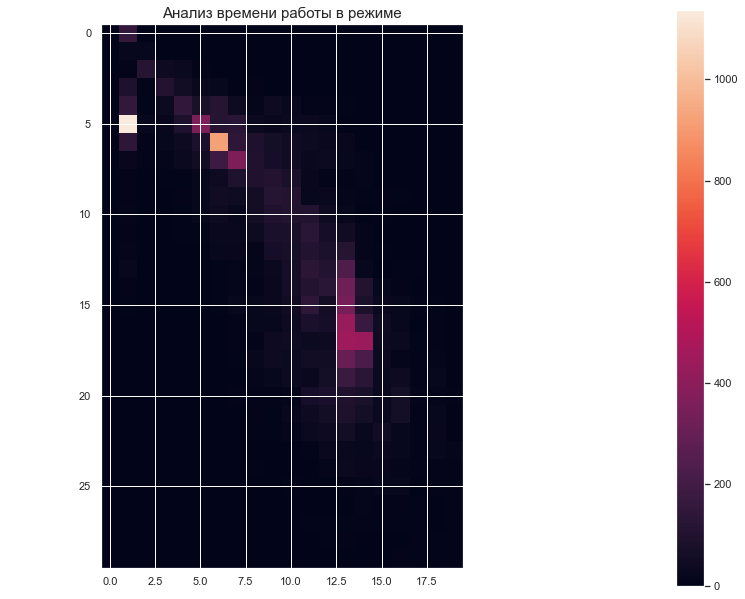

In [30]:
app_begine = 0#10
app_end = 30#25 #150/5 == 30
es_begine = 0#5
es_end = 20 #100/5 == 20
working_time_slice = working_time[app_begine:app_end]
working_time_changed = []
for i in range(len(working_time_slice)):
    raw_ = []
    for j in range(es_begine, es_end):
        raw_.append(working_time_slice[i][j])
    working_time_changed.append(raw_)

H = np.array(working_time_changed)
fig = plt.figure(figsize=(14, 10))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')
plt.title('Анализ времени работы в режиме', fontsize=15)
cax = fig.add_axes([0.24, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
#plt.colorbar(location='bottom')
plt.show()

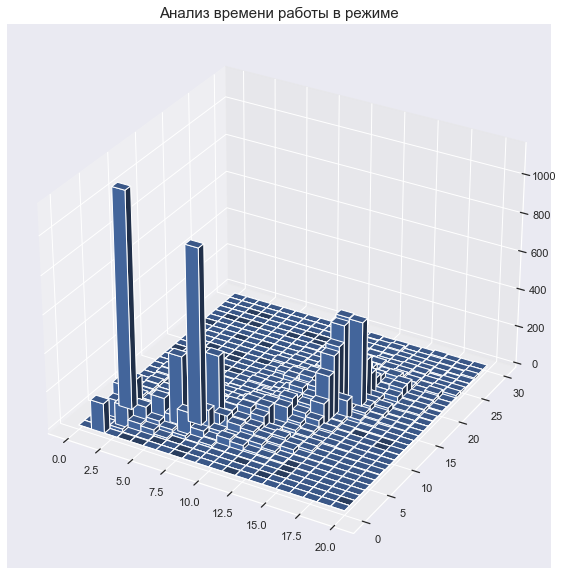

In [31]:
num_interval_es_ = es_end - es_begine
num_interval_app_ = app_end - app_begine
working_time_ = working_time_changed
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111, projection='3d')
plt.title('Анализ времени работы в режиме', fontsize=15)
y = np.array([[i] * num_interval_es_ for i in range(num_interval_app_)]).ravel()
x = np.array([i for i in range(num_interval_es_)] * num_interval_app_)
z = np.zeros(num_interval_es_*num_interval_app_)
dx = np.ones(num_interval_es_*num_interval_app_)
dy = np.ones(num_interval_es_*num_interval_app_)
A = np.array(working_time_)
dz = A.ravel()
#print(working_time_)
ax.bar3d(x, y, z, dx, dy, dz)
plt.show()

In [32]:
np.array(working_time[:])

array([[   0,  156,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   18,   18,    3,    3,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   12,  114,   42,   32,   11,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,   93,   13,  107,   54,   30,   18,    3,   12,    3,    2,
           3,    3,    0,    0,    0,    0,    0,    0,    0],
       [   0,  153,    8,   38,  150,   76,  116,   41,   16,   42,   31,
          12,    9,    6,    0,    3,    0,    0,    0,    0],
       [   0, 1137,   20,   24,   93,  366,  119,  127,   34,   24,   33,
          33,   18,    0,    0,    0,    0,    0,    0,    0],
       [   0,  138,   10,   20,   44,   87,  921,  139,   93,   64,   52,
          39,   27,   24,    3,    3,    3,    0,    0,    0],
       [   0,   24,   13,   15,   32,   5